# US Census Income Prediction

# Overview

Our goal in our project was to see if we can build a classification on our data set from the census bureau database to predict if someone makes more than $50,000 per year. In this dataset, there was a column that said if the individual was making more or less than this income threshold a year, letting us use this data set as both a training set and a test set. With this suitable data set, we transformed most of our categorical data set into numerical data and imported and ran a random forest classifier. In the end, our final classifier had a 79% accuracy on our given dataset, showing us that our classifier is suitable with decent accuracy.

# Names

- Justin Oh
- Akshay Bhide
- Areeb Syed
- Remcy Pimentel
- Khandker Hasan

<a id='research_question'></a>
# Research Question

Can we use various socio-economic factors of an individual to accurately predict whether or not that individual has an income of more than $50,000 a year?

<a id='background'></a>

## Background & Prior Work

There are so many socio-economic factors on determining what affects how one lives. Many of these socio-economic factors include occupation, education, wealth, the community that they live in, age, and race/ethnicity. We want to know whether or not these socio-economic factors contribute to someone making an income of at least $50,000. Figuring this out would also help us understand people’s living conditions such as access to resources such as health care, food, housing, education, etc. Furthermore, we can also use this information and observation to find out which communities are affected by poor socioeconomic factors and face discrimination and how badly they affect certain people within that community.

We did background and research work in machine learning problems, how to identify the problem we are working on, how to choose the right models, and how to implement the models. We learnt about feature engineering to get our columns in the optimal format for model input, and about training our models using these features, and finally assessing our model accuracy scores on test data.  

References (include links):
- 1) https://towardsdatascience.com/do-you-know-how-to-choose-the-right-machine-learning-algorithm-among-7-different-types-295d0b0c7f60

In this article we learned about how to categorize our problem so that we can choose the right type of machine learning model.

- 2) https://categitau.medium.com/in-one-of-my-previous-posts-i-introduced-machine-learning-and-talked-about-the-two-most-common-c1ac6e18df16#:~:text=Supervised%20learning%20includes%20two%20categories,is%20usually%20a%20discrete%20value

In this article, we learned about machine learning models specifically used for supervised learning and classification. This knowledge helped us in model selection. 

- 3) https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

This is the source to the scikit-learn library for RandomForestClassifier, where we imported the classifier from, and also learned about how to apply this model to our dataset.

- 4) https://www.weforum.org/agenda/2015/02/what-are-the-key-factors-affecting-us-middle-class-incomes/

We used this reference to get a better understanding of the factors that affect income. This article cites labour productivity, income inequality and labour force participation as driving factors for middle class income. Although our dataset doesn’t contain these metrics, reviewing and learning from this article proved to be valuable in increasing our overall understanding of the topic we’re exploring through this project.

- 5) https://www.the-learning-agency.com/insights/education-and-income-how-learning-leads-to-better-salaries

We used this reference to get more information on how education affects income. We knew that since education leads to better job opportunities, education’s effect on income would be apparent. However, we wanted to understand this affect on a more nuanced level. While this article shows us many metrics related to how higher education could lead to an increased salary, the biggest takeaway we had from this article was that graduating with a high school diploma is equivalent to an almost $7,000 increase in annual salary. This is significant because one of the specific variables we analyze is categorized information about education level.

# Hypothesis


We hypothesize that through the use of exploratory data analysis, key machine learning principles (feature engineering, model selection), and outside research, we’ll be able to build a model that can accurately predict whether or not an individual makes more than $50,000 a year.

# Dataset(s)

- Dataset Name: Census Income Data Set
- Link to the dataset: https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Census%20Income
- Number of observations: 48842 

This dataset is from the census bureau database, with almost 49000 instances of people, with columns for their age, sex, education level, native country, and other important details. We have a label column for if that person has an income of less or more than $50,000. This data set is split into training and testing sets with 32561 and 16281 instances each respectively.

# Setup

Importing all the libraries needed for this project.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import pandas as pd
import numpy as np

#model imports

#linear svc
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

#kn classifier
from sklearn.neighbors import KNeighborsClassifier

#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#random forest classifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

The dataset that we found was fairly clean, and we didn't have to do much to turn it into a format ready for analysis. First, for our test data file, we noticed that the first line of the csv was nonsense unrelated to the data, so we had to manually remove it and create a new file to read in. Secondly, the csv was formatted differently than pandas expects through the read_csv() function (the data had spaces after each comma), so we had to specify a new delimeter. Third, we used the data dictionary attached to these datasets to rename to columns with more informative names. Lastly, we found the value in our dataset that corresponded to a missing entry, and dropped those values (we dropped them instead of trying to replace them since they are categorical, which means sampling or imputation likely won't work).

The only changes and preprocessing we decided to add was change the ‘sex’ column and ‘income’ column to be encoded as 1s and 0s for easier visualization for our EDA, and could help models read the data down the line.

In [2]:
# read in first dataset and check its shape (training data)
df = pd.read_csv('data/adult.data.csv', sep = ', ', header=None)

In [3]:
df.shape

(32561, 15)

In [4]:
# read in second dataset and check its shape (test data)
df_test = pd.read_csv('data/adult.test2.csv', sep = ', ', header=None)

In [5]:
df_test.shape

(16281, 15)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# change column names based on information found in data dictionary to better describe data
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 
              'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df_test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 
              'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [8]:
# dataset with new column names
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [9]:
# missing data in this dataset is denoted with '?' as a response, replace with np.nan to 
# make dropping incomplete responses easier
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native-country'] = df['native-country'].replace('?', np.nan)

In [10]:
# a total of ~4000 that is missing
df.isnull().sum().sum()

4262

In [11]:
# dropping all the null values in the dataset
df = df.dropna(subset=['workclass', 'occupation', 'native-country'])

In [12]:
# no null values remaining
df.isnull().sum().sum()

0

In [13]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
# change binary variables to 0 or 1 
df['male'] = df['sex'].apply(lambda x: 1 if x=='Male' else 0)
df = df.drop('sex', axis=1)

In [15]:
# 'g50k' is greater than 50k, change to 0 and 1
df['g50k'] = df['income'].apply(lambda x: 1 if x=='>50K' else 0)
df = df.drop('income', axis=1)

In [16]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,male,g50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,0,0


# Data Analysis & Results

## EDA

In [17]:
#what are the data types of our columns?
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
male               int64
g50k               int64
dtype: object

In [18]:
#observing statistics across numerical columns
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,male,g50k
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.675685,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.468126,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000


### Investigating distributions of our columns

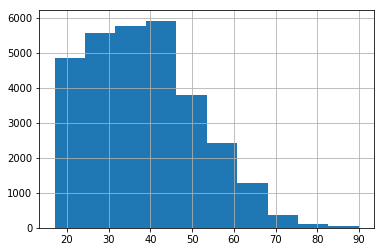

In [19]:
df.age.hist()

In the age distribution, we can see that the data is slightly left skewed, with a lot more people below 40 years old than above, and big drops as we reach 50, and 60 years old. This makes sense, as we have lesser people working, the closer we get to retirement age. Most working people are near 40 years of age. 

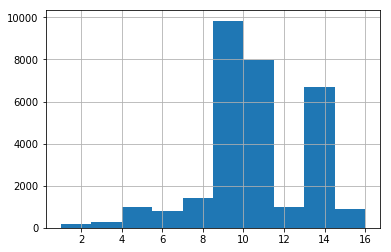

In [20]:
df['education-num'].hist()

Most people working have either graduated highschool or have a college degree, do it makes sense that most people working have around 10-14 years of education

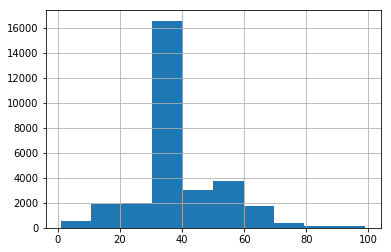

In [21]:
df['hours-per-week'].hist()

The hours per week of work are significantly larger at 40 hours than other hours, as this is the normal, full time work hour schedule in the United States, so it makes sense that most people are in this range of working hours. 

### Investigating category counts across categorical columns

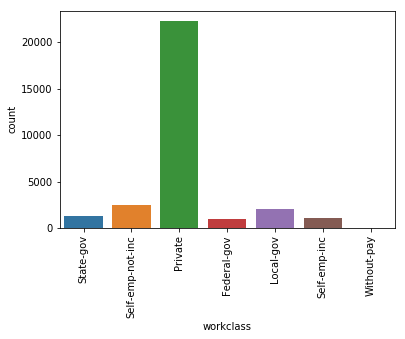

In [22]:
#investigating numbers of people across work classes
sns.countplot(x = 'workclass',data = df)
plt.xticks(rotation='vertical')
f1 = plt.gcf()

Most people in our dataset work in the private sector.

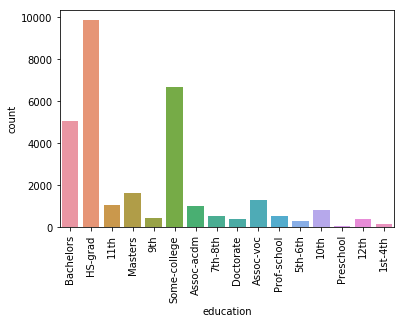

In [23]:
#investigating numbers of people across education levels
sns.countplot(x = 'education',data = df)
plt.xticks(rotation='vertical')
f1 = plt.gcf()

The highest level of education in terms of numbers in high school graduation, followed by some college education, then a bachelor's degree, and then a Master's degree. 

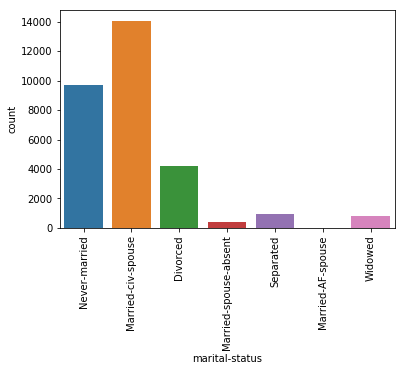

In [24]:
#investigating numbers of people across marital status
sns.countplot(x = 'marital-status',data = df)
plt.xticks(rotation='vertical')
f1 = plt.gcf()

As we saw earlier, our data set age average is around 38, so it makes sense that most people are married, followed by never married.

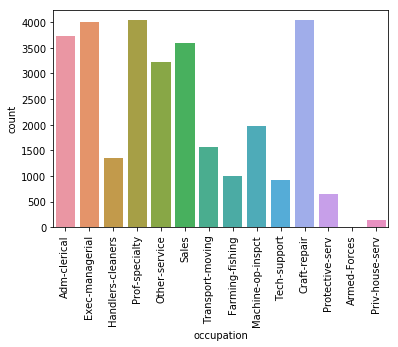

In [25]:
#investigating numbers of people across occupation
sns.countplot(x = 'occupation',data = df)
plt.xticks(rotation='vertical')
f1 = plt.gcf()

The occupations are spread out pretty evenly across our data set, with low numbers only in private house servants and armed forces

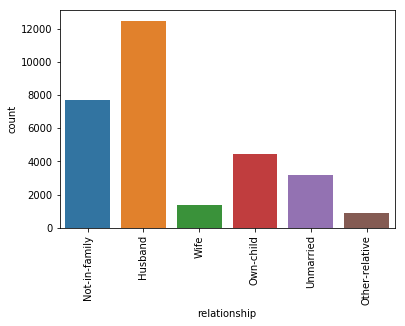

In [26]:
#investigating numbers of people across relationship
sns.countplot(x = 'relationship',data = df)
plt.xticks(rotation='vertical')
f1 = plt.gcf()

This chart shows the relationship status of our data set. We see that the highest amount of people are husbands.

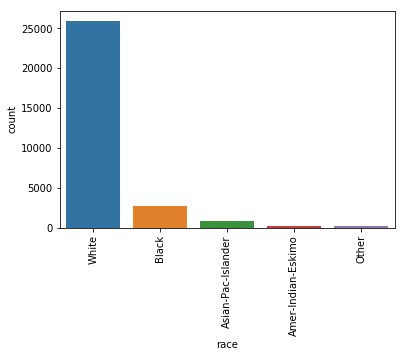

In [27]:
#investigating numbers of people across race
sns.countplot(x = 'race',data = df)
plt.xticks(rotation='vertical')
f1 = plt.gcf()

This chart shows us the race of our data set. We can see here that the majority of the people in our data set are White.

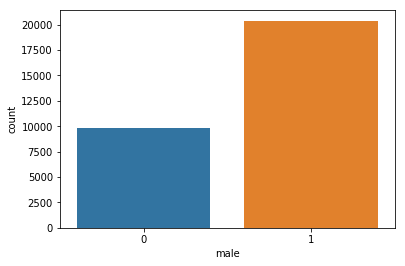

In [28]:
#investigating numbers of people across gender
sns.countplot(x = 'male',data = df)
#plt.xticks(rotation='vertical')
f1 = plt.gcf()

This chart shows us how many people are male and how many people are female. This chart also shows us that the majority of our data is male as well.

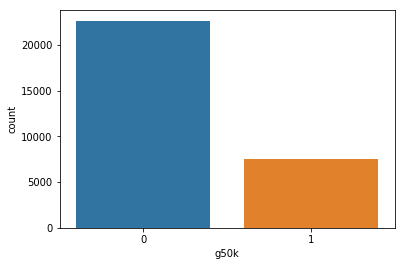

In [29]:
#investigating numbers of people who crossed the 50k mark
sns.countplot(x = 'g50k',data = df)
#plt.xticks(rotation='vertical')
f1 = plt.gcf()

This chart shows us how many people make $50,000 a year. The minority of people make greater than the income threshold a year in our data set.

In [30]:
#grouping by age groups to certain bins of 10 years
df['age_bin'] = df['age'].apply(lambda x: (x//10)*10)

In [31]:
grouped_ages = df.groupby('age_bin').agg('sum')
grouped_ages.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,male,g50k
age_bin,,,,,,,,
10,24908,269810370,11164,112019,55609,35964,707,1
20,183167,1476264042,74293,2210508,354489,288568,4564,493
30,283064,1587887301,84831,8200535,768860,357008,5807,2242
40,305052,1281678936,73049,10827425,784552,299409,4841,2592
50,225738,749649056,42110,7836838,482565,179440,3029,1638


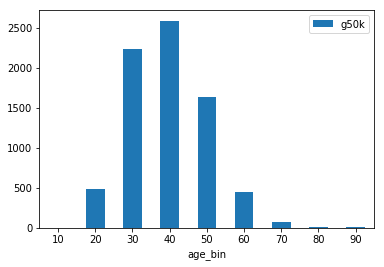

In [32]:
ax = grouped_ages.plot.bar( y='g50k',rot=0)

Here we can see that most people making greater than $50,000 are in their 40s, followed by 30s, and 50s. The 30-50 age range covers most people that make more than the income threshold in our dataset. As people get older, the number of people making more than the income threshold starts increasing till 40 years of age, and then it decreases.

In [33]:
#grouping by gender
grouped_genders = df.groupby('male').agg('sum')
grouped_genders.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,g50k,age_bin
male,,,,,,,,
0,360794,1818729604,98785,5577469,596103,361271,1112,316760
1,798570,3905832015,206494,27359672,2069388,873297,6396,707470


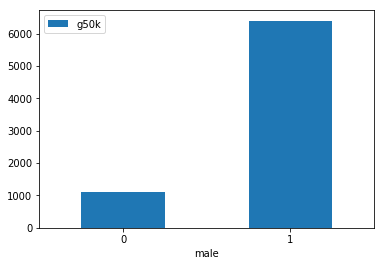

In [34]:
ax = grouped_genders.plot.bar( y='g50k',rot=0)

Here we can see that a lot more males make more than $50,000, than females. We also know that our dataset has a lot more males than females from one of our previous graphs.

In [35]:
#grouping by race
grouped_race = df.groupby('race').agg('sum')
grouped_race.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,male,g50k,age_bin
race,,,,,,,,,
Amer-Indian-Eskimo,10507,35318696,2676,188843,10629,11562,179,34,9290
Asian-Pac-Islander,33930,142606973,9868,1167416,82057,36248,601,248,29960
Black,106654,644550602,26848,1703502,158506,108946,1418,366,94000
Other,7762,45223387,2006,245011,11618,9266,144,21,6730
White,1000511,4856861961,263881,29632369,2402681,1068546,18038,6839,884250


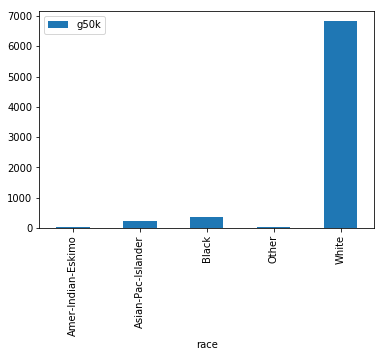

In [36]:
ax = grouped_race.plot.bar( y='g50k',rot=90)

As we know from previous analysis, most people in our dataset are white, and also most people making more than $50,000 are white.

### Investigating capital gain/loss

Capital gain and loss columns were mostly zeros, as shown below, which could be due to blank answers during the surveys. It is not possible for most people to have no capital gain or loss, so we will ignore these columns in our model, so as to not skew our predications based on non-answers

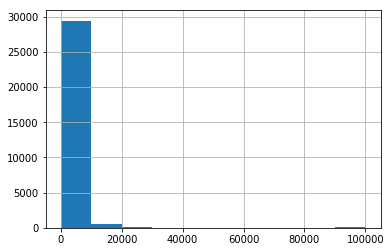

In [37]:
df['capital-gain'].hist()

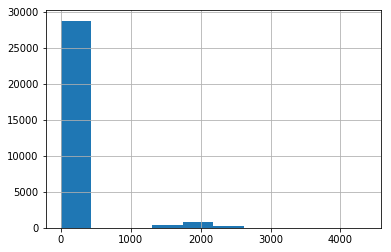

In [38]:
df['capital-loss'].hist()

## Analysis

We require machine learning to be able to predict if someone's income is above or below $50,000, based on the other attributes. To build a machine learning model that makes this prediction, we need to perform:

- Feature Engineering
- Model Selection
- Model Assessment

### Feature engineering

We have already cleaned our dataset, but this process involves getting all our columns in the optimal format to input into our model. This includes changes in data type and representation. For example, we already changed our binary categorical columns into 0 or 1. 

For our categorical columns with more than two categories, we will perform one hot encoding. One hot encoding encodes those features into lists of 0s and 1s, which are more suitable for our model, since from our research we found that most machine learning models can't interpret raw categorical text data like ours.  

Our numerical columns will not require any further changes to be inputs in our model.

In [39]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,male,g50k,age_bin
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,1,0,30
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,1,0,50
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,1,0,30
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,1,0,50
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,0,0,20


In [40]:
#dropping education since its the same as education_num but not numerical
df_model = df.drop('education', axis=1)
df_model.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,male,g50k,age_bin
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,1,0,30
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,1,0,50
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,1,0,30
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,1,0,50
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,0,0,20


In [41]:
len(df_model)

30162

In [42]:
#preprocessing categorical columns to extract unique categories
workclass_cat = [x for x in list(set(df_model['workclass'])) if type(x) is str]
education_num_cat = [x for x in list(set(df_model['education-num'])) if type(x) is str]
marital_status_cat = [x for x in list(set(df_model['marital-status'])) if type(x) is str]
occupation_cat = [x for x in list(set(df_model['occupation'])) if type(x) is str]
relationship_cat = [x for x in list(set(df_model['relationship'])) if type(x) is str]
race_cat = [x for x in list(set(df_model['race'])) if type(x) is str]
native_country_cat = [x for x in list(set(df_model['native-country'])) if type(x) is str]

In [43]:
# feature creating function for each row
def create_features(row):
    
    # onehot encoding categorical features
    workclass_onehot = [int(row.workclass == category) for category in workclass_cat]
    education_num_onehot = [int(row['education-num'] == category) for category in education_num_cat]
    marital_status_onehot = [int(row['marital-status'] == category) for category in marital_status_cat]
    occupation_onehot = [int(row.occupation == category) for category in occupation_cat]
    relationship_onehot = [int(row.relationship == category) for category in relationship_cat]
    race_onehot = [int(row.race == category) for category in race_cat]
    native_country_onehot = [int(row['native-country'] == category) for category in native_country_cat]
    
    # numerical features
    age = row.age
    education_num = row['education-num']
    hours_per_week = row['hours-per-week']
    male = row.male
    
    #returning a list of features for that specific row
    feature_row = [age,education_num, hours_per_week, male] + workclass_onehot + education_num_onehot + marital_status_onehot + occupation_onehot + relationship_onehot +race_onehot + native_country_onehot
    
    return feature_row 

In [44]:
#looping through each row of the dataframe, creating features, and adding them to training data
train_X, train_y = [], []
for (idx, row) in df_model.iterrows():
    g50k = float(row.g50k)
    feature = create_features(row)
    train_X.append(feature)
    train_y.append(g50k)

### Model Selection

By identifying our problem, and doing some research on machine learning, we know that our problem is of supervised learning and classification. So we need machine learning models that are meant to be used for classification. 

We tried various classifiers such as LinearSVC, K-Neighbours and Decision Tree, and found the best results with using a Random Forest Classifier. This classifier fits multiple decision tree classifiers on many subset samples of our data, and then averages results to improve accuracy and reduce overfitting. 

We import this model from the scikit-learn library : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [45]:
#Older classifiers used:
#clf = LinearSVC()
#clf = KNeighborsClassifier()
#clf = DecisionTreeClassifier()

#Fitting the Random Forest Classifier to our training data
clf = RandomForestClassifier()
clf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Model Assessment

We run the model on our test set. After this, we use scikit-learn's score method to find the accuracy of our model's predicted labels for the test set, when compared with the correct test labels. 

Testing data preprocessing: Applying the same data manipuation to test data as our training data

In [46]:
df_test['workclass'] = df_test['workclass'].replace('?', np.nan)
df_test['occupation'] = df_test['occupation'].replace('?', np.nan)
df_test['native-country'] = df_test['native-country'].replace('?', np.nan)
df_test = df_test.dropna(subset=['workclass', 'occupation', 'native-country'])
# change binary variables to 0 or 1 
df_test['male'] = df_test['sex'].apply(lambda x: 1 if x=='Male' else 0)
df_test = df_test.drop('sex', axis=1)
# 'g50k' is greater than 50k
df_test['g50k'] = df_test['income'].apply(lambda x: 1 if x=='>50K' else 0)
df_test = df_test.drop('income', axis=1)
#dropping education since its the same as education_num but not numerical
df_test = df_test.drop('education', axis=1)
df_test.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,male,g50k
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States,1,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States,1,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,1,0
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States,1,0
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,0,0,30,United-States,1,0


In [47]:
#looping through each row of the dataframe, creating features, and adding them to testing data
test_ids, test_X = [], []
for (idx, row) in df_test.iterrows():
    feature = create_features(row)
    test_ids.append(row.index)
    test_X.append(feature)

In [48]:
#predicted labels from our classifier
test_y = clf.predict(test_X)

In [49]:
#comparing predicted labels to actual labels of the test data, and finding accuracy score
#using scikit-learn's score method
clf.score(test_X,df_test.g50k.values)

0.7859229747675963

This means that for a new person, our model will correctly predict if they make above or below $50,000, 78.6% of the time. Running the model multiple times causes very little variation in this accuracy, and we always stay around this value. 

# Ethics & Privacy

While working on our study, the datasets that we collected involved a person’s biological background (sex, ethniciy, and age) as well as personal information about their life like their marital status, what they may work as, their income, etc. However, the dataset itself has no names that will link back people. Furthermore, the dataset was collected and sourced from the US Census Bureau whose information is publicly available and able to be used for our purposes.

As we worked on our project, we also found that our results might be biased due to the overwhelming number of people whose racial background was ‘white’. However, this is due to the data being derived from the U.S. population who is predominantly white.

# Conclusion & Discussion

We wanted to explore to what degree we could predict income based on socio-economic factors. After finding a dataset that incorporated census data that could help us answer this question, we did some background research to familiarize ourselves with the topic. After performing data cleaning, exploratory data analysis, feature engineering, model selection, and model assessment on the census data set, we’ve developed a model that can predict whether or not an individual makes $50,000 with about an 80% accuracy. 

This project is significant because we’ve proven that various socio-economic factors do have an impact on income, and have developed a model to do this prediction. However, there are some limitations of our project that relate to its scope. The analysis we performed only applies to the United States, since the source of our data is from the US Census Bureau. Another limitation of this project is that our model isn’t tuned as well as it could be. We could have tested even more models on our dataset, and tried tuning the various hyperparameters each model has to produce a better model accuracy.

In terms of how this project can impact society, we can use the work we’ve done through this analysis to address points that were outlined in our background section. Some of these applications include using this analysis to analyze access to healthcare, food, and housing based on income, or finding if certain racial, ethnic, or social groups disproportionately display poor socioeconomic (and in turn, income) situations, and if any systemic issues are the cause for this.


# Team Contributions

*Specify who in your group worked on which parts of the project.*

- Justin Oh : Problem formation, dataset selection, research question, hypothesis, overview, conclusions and discussion, slides for the video
- Akshay Bhide : Problem formation, dataset selection, research question, hypothesis, setup, data cleaning, data analysis and results, conclusion and discussion
- Areeb Syed : Problem formation, dataset selection, research question, hypothesis, dataset description, setup, data cleaning, EDA, data analysis and results
- Remcy Pimentel : Problem formation, dataset selection, research question, hypothesis, overview, Ethics & Privacy, slides for the video
- Khandker Hasan : Problem formation, dataset selection, research question, hypothesis, Background & Prior Work, Topic Research